# K_ras peptides

In [16]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

df_data = pd.read_csv('data/kras_kd/853_kras_kd.csv')
# df_data['IC50'] = df_data['IC50'].apply(lambda x: float(x.replace(',', '')))
df_data['score'] = df_data['KRAS_KD(nM)'].apply(lambda x: np.log10(x) if x > 0 else np.nan)
df_data.rename(columns={'SMILES': 'smi'}, inplace=True)

!mkdir -p data/kras_kd/raw
df_data = df_data.dropna(subset=['score'])
df_data.to_csv('data/kras_kd/raw/all.csv.gz', index=False, compression='gzip')
df_data.head()


,pp,smi,KRAS_KD(M),KRAS_KD(nM),score
0,PP0001,O=C(N(CC(N[C@@H](CCC1=CC(Cl)=C(C(F)(F)F)C=C1)C(N2[C@@H](CCC2)C(NC3(CCCC3)C(N([C@@H](C4CCCC4)C(N(C)[C@H](C(N5CCOCC5)=O)CC(N([C@H](C(N[C@@H]([C@H](CC)C)C(N([C@H](C(N6[C@H]7CC6)=O)C)C)=O)=O)CC(C)C)C)=O)=O)C)=O)=O)=O)=O)C)[C@H](CC8=CC=C(C)C=C8)N(C)C7=O,1.400000e-10,0.14,-0.853872
1,PP0002,O=C(N(CC(N[C@@H](CCC1=CC(Cl)=C(C(F)(F)F)C=C1)C(N2[C@@H](CCC2)C(NC3(CCCC3)C(N([C@@H](C4CCCC4)C(N(C)[C@H](C(N5CCOCC5)=O)CC(N([C@H](C(N[C@@H]([C@H](CC)C)C(N([C@H](C(N6[C@H]7CC6)=O)C)C)=O)=O)CC(C)C)C)=O)=O)C)=O)=O)=O)=O)C)[C@H](CC8=CC=C(C(F)(F)F)C=C8)N(CC)C7=O,1.800000e-10,0.18,-0.744727
2,PP0003,O=C(N(CC(N[C@@H](CCC1=CC(Cl)=C(C(F)(F)F)C=C1)C(N2[C@@H](CCC2)C(NC3(CCCC3)C(N([C@@H](C4CCCC4)C(N(C)[C@H](C(N5CCOCC5)=O)CC(N([C@H](C(N[C@@H]([C@H](CC)C)C(N([C@H](C(N6[C@H]7CC6)=O)C)C)=O)=O)CC(C)C)C)=O)=O)C)=O)=O)=O)=O)C)[C@H](C8CCCC8)N(CC)C7=O,2.000000e-09,2.00,0.301030
3,PP0004,O=C([C@@H](N(C1=O)C)CC2=CC=C(C=C2)C)N(CC)CC(N[C@H](C(N3[C@H](C(NC4(C(N(C)[C@H](C(N([C@@H](CC(N(C)[C@@H](CC(C)C)C(N[C@H](C(N(C)[C@@H](C)C(N5[C@H]1CC5)=O)=O)[C@@H](C)CC)=O)=O)C(N6CCOCC6)=O)C)=O)C7CCCC7)=O)CCCC4)=O)CCC3)=O)CCC8=CC(Cl)=C(C=C8)C(F)(F)F)=O,2.400000e-09,2.40,0.380211
4,PP0006,O=C([C@@H](N(CC)C1=O)CC2=CC=C(C=C2)C)N(CC)CC(N[C@H](C(N3[C@H](C(NC4(C(N(C)[C@H](C(N([C@@H](CC(N(C)[C@@H](CC(C)C)C(N[C@H](C(N(C)[C@@H](C)C(N5[C@H]1CC5)=O)=O)[C@@H](C)CC)=O)=O)C(N6CCOCC6)=O)C)=O)C7CCCC7)=O)CCCC4)=O)CCC3)=O)CCC8=CC(Cl)=C(C=C8)C(F)(F)F)=O,1.500000e-09,1.50,0.176091


x range: 0.0072 850.0
y range: 1.0593027563543e-303 0.9732206555561778


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

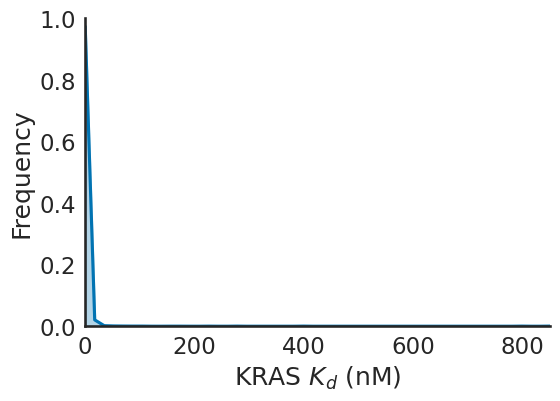

In [17]:
import matplotlib.pyplot as plt
from utils import plot_style_utils
import scipy.stats as stats

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")

# plot density of scores
scores = df_data['KRAS_KD(nM)'].dropna().values
x_min = np.min(scores)
x_max = np.max(scores)

x = np.linspace(x_min, x_max, 50)
y = stats.gaussian_kde(scores)(x)/sum(stats.gaussian_kde(scores)(x))

print('x range:', x_min, x_max)
print('y range:', np.min(y), np.max(y))

# ax.hist(df_data['score'], bins=100, color=plot_style_utils.CAT_PALETTE[0])
ax.plot(x, y, color=plot_style_utils.CAT_PALETTE[0])
ax.fill_between(x, 0, y, alpha=0.3, color=plot_style_utils.CAT_PALETTE[0])
ax.set_xlim(0, 850)
ax.set_ylim(0, 1)

ax.set_xlabel('KRAS $K_d$ (nM)')
ax.set_ylabel('Frequency')

plot_style_utils.prettify_ax(ax)
!mkdir -p figures/kras_kd
plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/kras_kd_dist')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


x range: -2.1426675035687315 2.929418925714293
y range: 0.00017070275249194187 0.06537775974553785


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

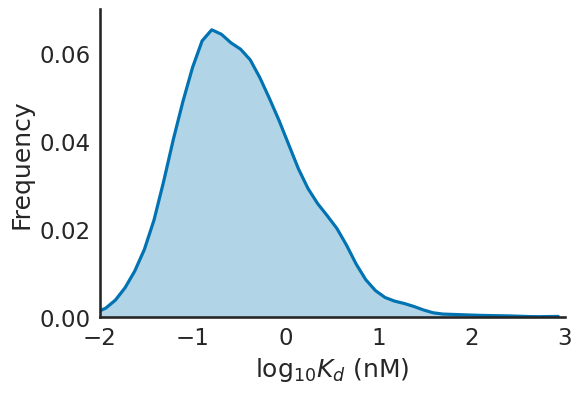

In [18]:
import matplotlib.pyplot as plt
from utils import plot_style_utils
import scipy.stats as stats

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")

# plot density of scores
scores = df_data['score'].dropna().values
x_min = np.min(scores)
x_max = np.max(scores)

x = np.linspace(x_min, x_max, 50)
y = stats.gaussian_kde(scores)(x)/sum(stats.gaussian_kde(scores)(x))

print('x range:', x_min, x_max)
print('y range:', np.min(y), np.max(y))

ax.plot(x, y, color=plot_style_utils.CAT_PALETTE[0])
ax.fill_between(x, 0, y, alpha=0.3, color=plot_style_utils.CAT_PALETTE[0])
ax.set_xlim(-2, 3)
ax.set_ylim(0, 0.07)

ax.set_xlabel('log$_{10}K_d$ (nM)')
ax.set_ylabel('Frequency')

plot_style_utils.prettify_ax(ax)
plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/kras_kd_log_dist')

## Feature processing

### Fingerprints (fps)

In [19]:
import warnings
import numpy as np
from rdkit import Chem, rdBase, DataStructs
from rdkit.Chem import AllChem
from typing import List

rdBase.DisableLog('rdApp.error')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def fingerprints_from_smiles(smiles: List, size=2048):
    """ Create ECFP fingerprints of smiles, with validity check """
    fps = []
    valid_mask = []
    for i, smile in enumerate(smiles):
        mol = Chem.MolFromSmiles(smile)
        valid_mask.append(int(mol is not None))
        fp = fingerprints_from_mol(mol, size=size) if mol else np.zeros((1, size))
        fps.append(fp)

    fps = np.concatenate(fps, axis=0)
    return fps, valid_mask


def fingerprints_from_mol(molecule, radius=3, size=2048, hashed=False):
    """ Create ECFP fingerprint of a molecule """
    if hashed:
        fp_bits = AllChem.GetHashedMorganFingerprint(molecule, radius, nBits=size)
    else:
        fp_bits = AllChem.GetMorganFingerprintAsBitVect(molecule, radius, nBits=size)
    fp_np = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp_bits, fp_np)
    return fp_np.reshape(1, -1)

In [20]:
train = True
# train = False
if train:
    X_fps = fingerprints_from_smiles(df_data.smi)[0]
    ! mkdir -p data/kras_kd/processed
    np.save('data/kras_kd/processed/X_fps.npy', X_fps)
else:
    X_fps = np.load('data/kras_kd/processed/X_fps.npy')

X_fps.shape

(2757, 2048)

### RDKit descriptors

In [21]:
import warnings
import numpy as np
from rdkit import Chem, rdBase, DataStructs
from rdkit.Chem import AllChem
from typing import List
from rdkit import rdBase, Chem
from rdkit.Chem import Descriptors, rdMolDescriptors

rdBase.DisableLog('rdApp.error')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def getMolDescriptors(mol, missingVal=0):
    """ calculate the full list of descriptors for a molecule """

    values, names = [], []
    for nm, fn in Descriptors._descList:
        try:
            val = fn(mol)
        except:
            val = missingVal
        values.append(val)
        names.append(nm)

    custom_descriptors = {'hydrogen-bond donors': rdMolDescriptors.CalcNumLipinskiHBD,
                          'hydrogen-bond acceptors': rdMolDescriptors.CalcNumLipinskiHBA,
                          'rotatable bonds': rdMolDescriptors.CalcNumRotatableBonds,}
    for nm, fn in custom_descriptors.items():
        try:
            val = fn(mol)
        except:
            val = missingVal
        values.append(val)
        names.append(nm)
    return values,names

# getMolDescriptors('CC(=O)SCCCC[C@H](N)C(O)=O')

#### Peptide descriptors

In [22]:
def get_pep_dps_from_smi(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
    except:
        print(f"convert smi {smi} to molecule failed!")
        mol = None
    
    dps, _ = getMolDescriptors(mol)
    return np.array(dps)

def get_pep_dps(smi_list):
    return np.array([get_pep_dps_from_smi(smi) for smi in smi_list])

In [23]:
import numpy as np

train = True
# train = False
if train:
    
    X_dps = get_pep_dps(df_data.smi)

    np.save('data/kras_kd/processed/X_dps.npy', X_dps)
else:
    X_dps = np.load('data/kras_kd/processed/X_dps.npy')

X_dps.shape

(2757, 212)

## Modeling

### Final features

In [39]:
# features = ['dps', ] # 0.638, 0.534
features = ['fps', ] # 0.879, 0.820; 
# features = ['dps', 'fps', ]  # 0.862, 0.760

X_features = []
for feat in features:
    try:
        X_feat = np.load(f'data/kras_kd/processed/X_{feat}.npy')

        X_features.append(X_feat)
    except:
        raise ValueError(f'Feature {feat} not supported')

X = np.concatenate(X_features, axis=1)
y = df_data['score'].values
X.shape, y.shape

((2757, 2048), (2757,))

In [40]:
import pickle

val_split = 1
split_file = 'data/kras_kd/raw/scaffold_k_fold_idxes.pkl'
with open(split_file, 'rb') as f:
    split_idx = pickle.load(f)

val_idx = split_idx[val_split]
test_idx = split_idx[val_split+1]
train_splits = [split_idx[i] for i in range(len(split_idx))if i != val_split+1 and i != val_split]  # the rest are training data
train_idx = np.concatenate(train_splits, axis=0)

In [41]:
X_train, X_val, X_test = X[train_idx], X[val_idx], X[test_idx]
y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

### XGBoost regressor

In [42]:
from xgboost import XGBRegressor
import joblib

from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)

# X_val = scaler.transform(X_val)
y_val_hat = model.predict(X_val)
# X_test = scaler.transform(X_test)
y_test_hat = model.predict(X_test)

In [43]:
from scipy import stats


y_hat_val_test = np.concatenate([y_val_hat, y_test_hat])
y_val_test = np.concatenate([y_val, y_test])
spearman = stats.spearmanr(y_hat_val_test, y_val_test)
print(f'Val+Test Spearman: {spearman[0]:.3f}, p-value: {spearman[1]:.3f}')

spearman = stats.spearmanr(y_train_hat, y_train)
print(f'Train Spearman: {spearman[0]:.3f}, p-value: {spearman[1]:.3f}')
spearman = stats.spearmanr(y_val_hat, y_val)
print(f'Val Spearman: {spearman[0]:.3f}, p-value: {spearman[1]:.3f}')
spearman = stats.spearmanr(y_test_hat, y_test)
print(f'Test Spearman: {spearman[0]:.3f}, p-value: {spearman[1]:.3f}')

Val+Test Spearman: 0.820, p-value: 0.000
Train Spearman: 0.989, p-value: 0.000
Val Spearman: 0.705, p-value: 0.000
Test Spearman: 0.879, p-value: 0.000
